# Estimating Network Connectivity by Evaluating Feature Importance in Machine Learning

# I. Introduction

Functional magnetic resonance imaging (fMRI) has recently become more popular for measuring neuronal activities [1].
Functional magnetic resonance signals show the change in the blood oxygen level in the scanned area [2]. These changes
occur when neurons are activated and deactivated, respectively
[1]. Due to its non-invasive nature, fMRI can easily be used
for investigations of the brain. Inter-regional connectivity is
crucial for large-scale networks like the brain [3]. Using fMRI
can reveal functional connections that describe patterns and
dynamic interactions between regions [4]. These connections
imply the stimulation of neurons in different regions connected
to the activated neuron. Since everyone’s neuronal system is
unique [5], it is essential to recognize similarities in diseases
and specific behaviors or to further investigate implied con-
sequences from different connections [6]. This research aims
to find a new approach to derive functional connectivity from
blood-oxygen-level-dependent (BOLD) data. For this, I trained
various neural networks on artificial dynamic causal modeling
(DCM) network data. The objective of these models will be
to predict a specific signal of one region of interest (ROI)
by analyzing all signals in a specified time window. Aftward,
I use the same data to evaluate my models and to test my
approaches. For the task of time-series forecasts, recurrent
neural networks (RNN) are a common approach and show
promising results in various topics [7], [8]. With increasing ac-
curacy, the model should learn which signals influence others.
Thus, by evaluating the importance of different features for the
model, it should be possible to differentiate between connected
and non-connected neurons. Investigating the importance of
features for a model’s predictions is a task of explainable
artificial intelligence. Post-hoc methods, which describe how a
model’s prediction is calculated, can be applied to this topic.
In addition, one can use such methods for complex models
that do not need to be comprehensible by nature. This makes
it possible to use any model structure. The method that I use
in this research to reveal the importance of features is Deep
SHAP. Throughout the experiments, in this investigation I assume that the set of possible connections is known, and thus other connections can be dropped.

# Related Work

Currently, fMRI is well-established in clinical, pharmaco-
logical, and mental health studies [9]. For such research,
fMRI can reveal important aspects, such as differences in
activities and connectivity in the brain [9]. In addition, multiple
studies aim to explain connectivity differences for patients
with Alzheimer’s disease [10].
Different problems occur in the investigation of functional
connectivity with fMRI. One is that functional connectivity is
purely correlative in nature [11]. Thus, additional structures
can mediate connections between non-connected regions [11].
This mediation can imply strong correlations between the other
regions [11]. Nevertheless, analyzing connectivity in the brain
can help understand their relation to human behavior and
multiple diseases [12]. One approach for assessing functional
connectivity is to evaluate the BOLD signal in an awake
state without any task using resting-state functional MRI (rs-
fMRI) [13]–[15]. One way to assess connectivity in resting-
state fMRI is to use variations of dynamic causal modeling
[14], [15].
Generally, the BOLD signals captured in time series data
can be discrete or continuous [16]. Furthermore, the corre-
lations resulting from functional connectivity are quantified
with statistical dependence [16]. Thus, one can investigate
such connections using any generic method for approximating
statistical dependencies in time series data [16]. Deep learning
approaches are helpful tools for solving various prediction
problems. For estimating connections in the brain, the authors
of [17] use the Granger causality estimator to predict connec-
tivity. To the best of my knowledge, until today, no investiga-
tions aim to estimate functional connectivity by evaluating the
feature importance of predictive machine learning models.
Different explainable artificial intelligence (XAI) methods
have been developed to reveal the underlying concepts of
a machine-learning model. Explainable artificial intelligence
methods can be divided into two different types of methods.
On the one hand, ante-hoc methods that are used to introduce
explainability in a model from the beginning. On the other
hand, there are post-hoc methods. Such methods aim to explain
the calculation for specific predictions of models that are too
complex to evaluate directly. For complex time series, such
models are needed to learn underlying patterns [18]. One
specific type is the long short-term memory model (LSTM).
Recently, it has often been used for time series analysis and
shows significant improvements [19].
To explain LSTMs, one can apply various post-hoc methods.
Two widely used methods are saliency [20], [21] and SHAP-
based [22] methods. Saliency methods can differ vastly, but
always try to reveal the most salient inputs for a prediction.
SHAP explanations use the Shapley values’ theoretical founda-
tion to explain each input eature’s contribution in a machine-
learning model. SHAP calculates SHAP values using the following formula.

$$
\phi (i) = \sum_{S\in F\backslash \{i\}} \frac{(|S|!(|F| - |S| -1)!}{|F|!} \Delta _i
$$

In the formula, F denotes the power set over all possible features. The variable i refers then to one specific feature, and $ \Delta_i = [ f_{S \cup \{i\}} (X_S \cup \{i\}) - f_S (X_S)]$ is the calculated difference between the prediction that considers the feature i and a prediction without the feature i. Where those predictions relate to a simpler local surrogate model to approximate the behavior of the original model. Thus, the original formula computes the sum of all weighted differences in the outcome predictions. Even though this formula builds a robust theoretical foundation
for SHAP which leads to good results for various types
of models [23]. The Formula also implies considering the
contribution of a feature in every possible coalition. Thus,
contributions for 2i coalitions, where i is the number of
features, must be checked. The authors of [22] tackle this issue
by proposing a combination of the idea of SHAP and another
post-hoc method, DeepLift [24], to determine the importance
of features.
DeepLift belongs to the category of gradient-based ex-
planation methods. However, the concept of DeepLift is to
avoid expensive derivatives and instead calculate differences
to specific reference values and propagate these differences
through the network [24]. Deep SHAP, approximates the
SHAP values using DeepLift with the reference value defined
as the expected output of the model E[x].

# Methods

## Data

The data that was used for this investigation was created with the Dynamic Causal Model (DCM) approach from [25].
This method models brain networks as a set of K state-space
equations. Each equation represents the dynamics of a brain
region. The state-space and output equations are given by the following formulas, respectively.
$$\dot{\mathbf{x}}(t) = \mathbf{A}*\mathbf{x}(t) + \mathbf{C}*\mathbf{u}(t)$$

$$y_k(t) = x_k(t) * h(t),  \quad k = {1,\dots,K}$$

In the first formula, $\mathbf{x}(t)\in\mathbb{R}^K$ represents the neural states, and $\mathbf{u}(t)\in\mathbb{R}^K$ the input stimulus sequence. In second formula, $y_k(t)$ is the BOLD signal. It results from the convolution of the neural states and the Hemodynamic Response Function (HRF), $h(t)$. The variable $\dot{\mathbf{x}}(t)$ denotes the temporal derivative of the node's time courses. The matrix $\mathbf{A}\in\mathbb{R}^{K\times K}$ holds the temporal decay and the true connections between nodes. The second matrix, $\mathbf{C}\in\mathbb{R}^{K\times K}$ generally represents how the stimuli flow through the network and was set to the identity matrix. For this research input stimuli were generated as binary sequences with random onset times, and with BOLD signals returning to baseline before the next stimulus [26].


## Experiments

The following experiments are structured as follows.
First, I tested the possible mappings of three different LSTM structures with one, two, and three LSTM layers.
In addition, I tested if the own signal should be included as a feature or not.
For each variant, I tried different combinations of window size and hidden layers.
I continued to use the model, which held the best possible mapping for further investigation.
Evaluating if outliers of the checked hyperparameters show better results, I tested the best model structure with increased window sizes and large hidden layer numbers.
In addition, I will validate an underfitting model by training this model only for one epoch and an overfitting model for 100 epochs.
The best set of hyperparameters was then tested for consistency.
For this, I trained a set of equal models on different randomly split and shuffled train and test time series.
The following figure shows an overview of the method proposed to estimate connectivity in the network data.

![Method-Investigation.jpg](attachment:e9165ade-4689-4f0d-a7a5-7efa581e7531.jpg)

### Imports and Helper Functions for Data Loading and Handling

In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import sys
sys.path.append('scripts')
from utils import load_nii, save_nii, \
                    signal_2_var, force_lower_triangular, var_parameters_2_A, \
                    get_dcm_node_signals, plot_dcm


## Loading DCM data of one subject

In [ ]:
datadir = os.path.join('data_dcm_exp1', 'nds10_conn20', 'sub1')
A = load_nii(os.path.join(datadir, 'A.nii')) # True network connections
Altri = force_lower_triangular(A) # A as lower triangular matrix
U = load_nii(os.path.join(datadir, 'U.nii')) # pseudoevents used to generate BOLD fluctuations
X = load_nii(os.path.join(datadir, 'X_snr5.nii')) # BOLD fluctuations


# N_pts is the number of time points of each signal sampled every TR seconds
# N_nds is the number of brain regions = number of DCM nodes
# N_signals is the number of signals belonging to each brain region (assumed to be equal for each brain node, this is not true for real data)
N_pts, N_nds, N_signals = X.shape
N_conn = np.sum( Altri!=0 ) # number of connections (number of A matrix entries greater than zero)
TR = 1
timeline = TR * np.arange(0, N_pts)

print(f'Time points: {N_pts}\nNumber of DCM nodes (brain regions): {N_nds}\nNumber of signals per region: {N_signals}\nNumber of connections: {N_conn}')
print(f'Shape of X: {X.shape}\nShape of A: {A.shape}\nShape of U: {U.shape}')


Time points: 300
Number of DCM nodes (brain regions): 10
Number of signals per region: 100
Number of connections: 20
Shape of X: (300, 10, 100)
Shape of A: (10, 10)
Shape of U: (300, 10)


## DCM signals averaging

This reduces the data dimension (number of time points, number of brain regions, number of signals per brain region) by averaging over the third dimension. The average is a bad idea for data fusion, but it is typically used in most research works.

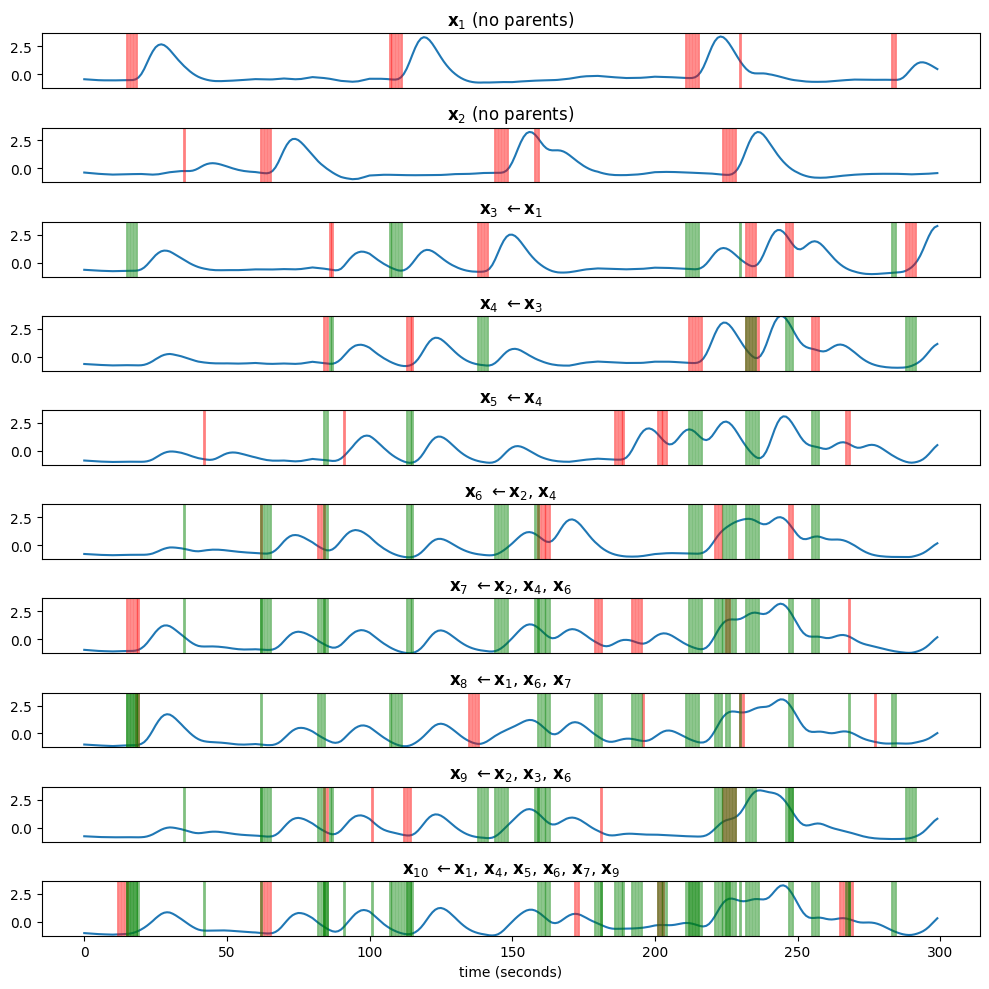

In [ ]:
Xav = X.mean(axis=2)
#plot_dcm(Xav[1000:,:], A, U[1000:,:], timeline[1000:])
plot_dcm(Xav, A, U, timeline)

(30000,) (30000, 10) (30000, 10)


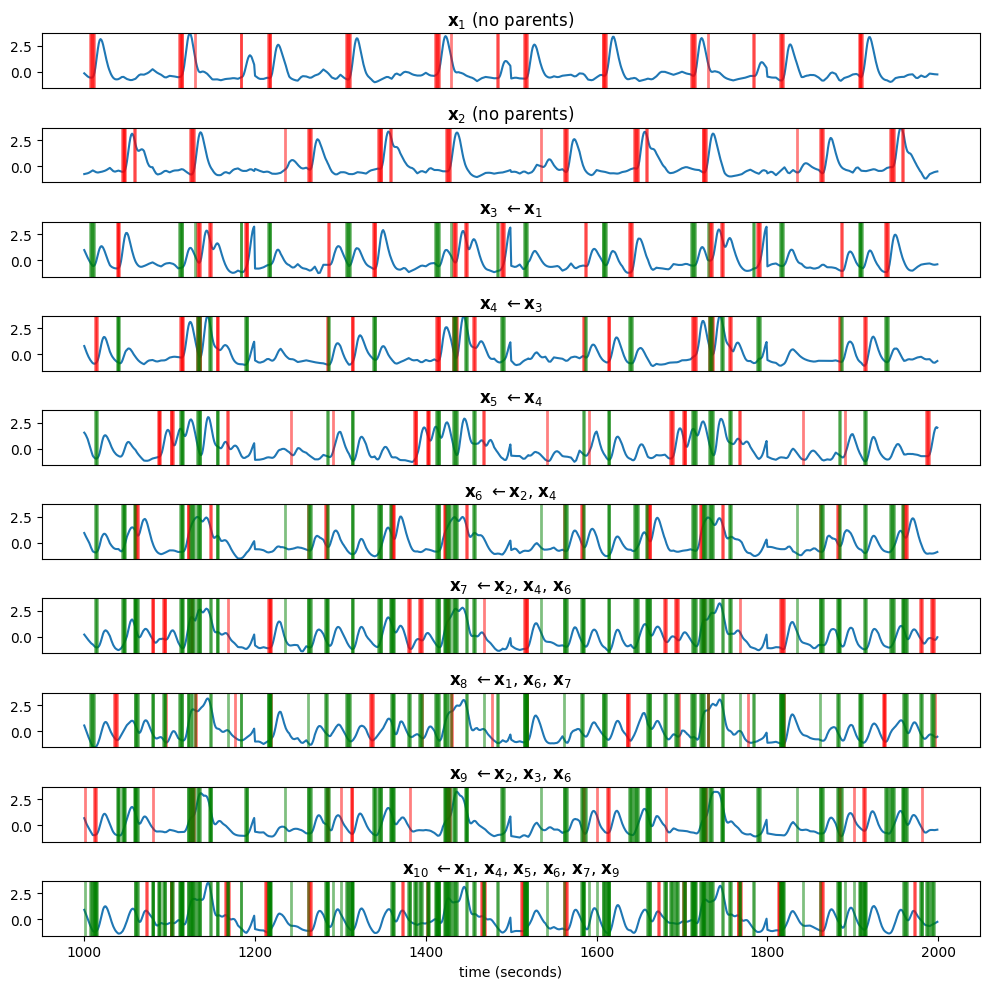

In [ ]:
Xc = np.concatenate([X[:,:,i] for i in range(X.shape[2])], axis=0)
Uc = np.tile(U, (100,1))
timeline = TR * np.arange(0, Xc.shape[0])
print(timeline.shape, Uc.shape, Xc.shape)
n1, n2 = 1000, 2000
plot_dcm(Xc[n1:n2,:], A, Uc[n1:n2,:], timeline[n1:n2])

# Using Deep SHAP to estimate connectivity by explaining LSTMs for Signal Predictions

## Imports and Helper Functions for the Experiments

In [ ]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import get_session
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Define different models in keras
def create_model(window_size, input_size, hidden_size, output_size, optimizer, type="lstm"):
    """
    This function creates an keras rnn model for the given input parameters
    args:
        window_size: defines dependency to window_size lag values (input data need to has correct shape)
        input_size: number of input features per time step
        hidden_size: hidden size of each lstm layer
        output_size: output size for the model (1 for one signal)
        optimizer: choose keras optimizer
        type: choose "lstm" => two lstm layers at the start, "rnn" => one simple rnn layer at the start, "gru" => one gru layer at the start

    returns: keras model with specified hyperparameters and layers
    """
    model = Sequential()
    if type == "lstm":
        model.add(LSTM(hidden_size, input_shape=(window_size, input_size), return_sequences=True))
        model.add(LSTM(hidden_size, input_shape=(window_size, input_size), return_sequences=False))
    elif type == "rnn":
        model.add(SimpleRNN(hidden_size, input_shape=(window_size, input_size)))
    elif type == "gru":
        model.add(GRU(hidden_size, input_shape=(window_size, input_size)))
    model.add(Dense(output_size))
    model.compile(optimizer=optimizer, loss='mean_squared_error') # optimizer can also be rmsprop
    return model

In [ ]:
def convert_true_connections(true_connections):
    """
    This function converts a float or int matrix to a 0 and 1 matrix where each value unequal to 0 becomes 1 and 0 stays 0.
    args:
        true_connections: a np array of arrays holding the original matrix
    returns:
        result_matrix: 0 and 1 matrix
    """
    boolean_matrix = true_connections != 0
    result_matrix = boolean_matrix.astype(int)
    return result_matrix

In [ ]:
# Create input sequences and corresponding labels
def create_input_output(features, feature_names, labels, window_size, model_features="all"):
    """
        This function creates the input data for dcm data for creating n models for each signal one model.
        args:
            features: the feature data that should be divided into time series
            feature_names: the feature names as list
            labels: list of labels
            window_size: the window_size which the model will use to capture past dependencies
            model_features: "all" => all signals are included as features, "without_own" => all signals except for the output one are included as features
            "only_possible" => if signal n is the output then features are given by signal 1 to signal n-1
    """
    if model_features == "all":
        X, y = [], [[] for i in range(len(feature_names))]
        # relate features to labels
        for ouput_signal in range(len(feature_names)):
            for i in range(len(features) - window_size):
                if ouput_signal == 0:
                    X.append(features[i:i+window_size, :])
                y[ouput_signal].append(labels[ouput_signal][i+window_size])
    elif model_features == "without_own":
        X, y = [[] for i in range(len(feature_names))], [[] for i in range(len(feature_names))]
        for output_signal in range(len(feature_names)):
            for i in range(len(features) - window_size):
                X[output_signal].append(np.delete(features[i:i+window_size, :], output_signal, axis=-1))
                y[output_signal].append(labels[output_signal][i+window_size])
    elif model_features == "only_possible":
        X, y = [[] for i in range(len(feature_names))], [[] for i in range(len(feature_names))]
        for output_signal in range(len(feature_names)):
            for i in range(len(features) - window_size):
                X[output_signal].append(np.delete(features[i:i+window_size, :], [i for i in range(output_signal, len(feature_names))], axis=-1))
                y[output_signal].append(labels[output_signal][i+window_size])

    return np.array(X), np.array(y)

In [ ]:
def get_train_test_data(X, y, random_state=42, model_features="all"):
    """
        This function splits the data in test and train sets.
        args:
            X: the feature data produced by create_input_output
            y: the labels produced by create_input_output
            random_state: random seed for the train_test_split method
            model_features: choose the same as in create_input_output
        returns:
            train features set, train label set, test feature set, test label set
    """
    if model_features == "all":
        y_tests = []
        y_trains = []
        for output_signal in range(len(feature_names)):
            X_train, X_test, y_train, y_test = train_test_split(X, y[output_signal], test_size=0.2, random_state=random_state)
            y_tests.append(y_test)
            y_trains.append(y_train)
        return X_train, y_trains, X_test, y_tests
    elif model_features == "without_own":
        X_trains, X_tests, y_trains, y_tests = [], [], [], []
        for output_signal in range(len(feature_names)):
            X_train, X_test, y_train, y_test = train_test_split(X[output_signal], y[output_signal], test_size=0.2, random_state=42)
            X_trains.append(X_train)
            X_tests.append(X_test)
            y_trains.append(y_train)
            y_tests.append(y_test)
        return X_trains, y_trains, X_tests, y_tests

In [ ]:
# Split the data into training and testing set
def get_trained_models(feature_names, X_train, y_trains, X_test, y_tests, epochs=10, type="lstm", window_size=5, hidden_size=16, optimizer="adam", output_size=1, model_features="all"):
    """
    This function trains n models for n signals with the given hyper parameters.
    args:
        feature_names: the feature names as a list
        X_train, y_trains, X_test, y_tests: the output of get_train_test_data
        epochs: int defining the amount of training epochs, default=10
        type: "lstm", "rnn", "gru" to define what kind of model should be trained, default=lstm
        window_sitze: the window_size that was also used for creating the input data, default=5
        hidden_size: the hidden size the recurrent layer should use, default=16
        optimizer: keras optimizer, default="adam"
        ouput_size: ouput size of each model, default=1
        model_features: the model_features that were used since create_input_output

    returns: n keras models, each as tuples holding (model, the last validation loss, the last train loss)
    """
    models = []
    for output_signal in range(len(y_trains)):
        if model_features == "all":
            input_size = X_train.shape[2]
            model = create_model(window_size, input_size, hidden_size, output_size, optimizer, type=type)
            history = model.fit(X_train, y_trains[output_signal], epochs=epochs, batch_size=32, validation_data=(X_test, y_tests[output_signal]))

        elif model_features == "without_own":
            input_size = X_train[0].shape[2]
            model = create_model(window_size, input_size, hidden_size, output_size, optimizer, type=type)
            history = model.fit(X_train[output_signal], y_trains[output_signal], epochs=epochs, batch_size=32, validation_data=(X_test[output_signal], y_tests[output_signal]))

        final_val_error = history.history['val_loss'][-1]
        final_train_loss = history.history['loss'][-1]
        models.append((model, final_val_error, final_train_loss))
    return models

In [ ]:
def get_explainers_shap(models, X_train, X_test, model_features="all"):
    """
        This function calculates shap values for each given model with the Deep Explainer
        args:
            models: list of models for which you want to calculate shap values (Deep Shap does not know pytorch lstm or keras2 usualy keras 1 are safely usable)
            X_train: training data for which you want to create explainers
            X_test: test data for which you want to calculate shap values
            model_features: the model_features that were used since create_input_output
        returns tuple holding all explainers for all models, the mean_shap_values for each lag value averaged over all time series in X_test, all shap values
    """
    if model_features == "all":
        explainers = [shap.DeepExplainer(models[i], X_train) for i in range(len(models))]
        shap_values = [explainers[i].shap_values(X_test[:])[0] for i in range(len(explainers))]
        mean_shap_values = [np.mean(shap_values[i], axis=0) for i in range(len(shap_values))]
    elif model_features == "without_own":
        explainers = [shap.DeepExplainer(models[i], X_train[i]) for i in range(len(models))]
        shap_values = [explainers[i].shap_values(X_test[i][:])[0] for i in range(len(explainers))]
        mean_shap_values = [np.mean(shap_values[i], axis=0) for i in range(len(shap_values))]
    return explainers, mean_shap_values, shap_values

In [ ]:
def get_connections_from_shap(mean_shap_values, model_features="all", absolute=True):
    """
    This function calculates matrices from the shap values
    args:
        mean_shap_values: shap values averaged over all test time series.
        model_features: the model_features that were used since create_input_output
        absolute: will return matrices only holding the absolute shap value
    returns:
        tuple holding three matrices with values:
    """
    mean_shap_values = np.abs(mean_shap_values)
    if model_features == "all":
        summed_up_shap_values = [np.sum(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
        lag_max_connections = [np.max(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
        lag_min_connections = [np.min(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
        lag_total_summed_connections = summed_up_shap_values
    elif model_features == "without_own":
        summed_up_shap_values = [np.insert(np.sum(np.abs(mean_shap_values[i]), axis=0), i, 0) for i in range(len(mean_shap_values))]
        lag_max_connections = [np.insert(np.max(mean_shap_values[i], axis=0), i, 0) for i in range(len(mean_shap_values))]
        lag_min_connections = [np.insert(np.min(mean_shap_values[i], axis=0), i, 0) for i in range(len(mean_shap_values))]
        lag_total_summed_connections = summed_up_shap_values
    else:
        print("please enter a possible set of model_features")
        return 0

    if absolute:
        return np.abs(np.array(lag_max_connections)), np.abs(np.array(lag_min_connections)), np.abs(np.array(lag_total_summed_connections))
    else:
        return np.array(lag_max_connections), np.array(lag_min_connections), np.array(lag_total_summed_connections)


def get_connections_from_shap_dX2(mean_shap_values):
    mean_shap_values = np.abs(mean_shap_values)
    #summed_up_shap_values = [np.sum(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
    summed_up_shap_values = [np.insert(np.sum(np.abs(mean_shap_values[i]), axis=0), i, 0) for i in range(len(mean_shap_values))]
    #lag_max_connections = [np.max(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
    lag_max_connections = [np.max(mean_shap_values[i], axis=0) for i in range(len(mean_shap_values))]
    lag_min_connections = [np.insert(np.min(mean_shap_values[i], axis=0), i, 0) for i in range(len(mean_shap_values))]
    lag_total_summed_connections = summed_up_shap_values
    return np.abs(np.array(lag_max_connections)), np.abs(np.array(lag_min_connections)), np.array(lag_total_summed_connections)


In [ ]:
def calculate_lower_triangular(matrix, type="sum"):
    """
    This function calculates the lower triangular matrix from a given matrix using a specific mapping type.
    args:
        matrix: np array of shape NxN corresponding to a matrix of shapley values
        type: "sum" to sum corresponding values (i,j) and (j,i), "delete" to just delete the upper triangular matrix,
        "sum" to sum the corresponding values but using a factor of 0.5 for the value of index (j, i), "max" to choose the maximum value
    returns: lower triangular matrix holding the calculated SHAP values
    """
    matrix = abs(matrix)
    rows, cols = matrix.shape
    result_matrix = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(i):
            # Sum the corresponding elements above and below the diagonal
            #if j == i:
                #result_matrix{i, j] = matrix{i, j]
            if type=="sum":
                result_matrix[i, j] = matrix[i, j] + matrix[j, i]
            elif type=="delete":
                result_matrix[i, j] = matrix[i, j]
            elif type=="sum2":
                result_matrix[i, j] = matrix[i, j] + 0.5*matrix[j, i]
            elif type=="max":
                if matrix[i, j] > matrix[j, i]:
                    result_matrix[i, j] = matrix[i, j]
                else:
                    result_matrix[i, j] = matrix[j, i]
            else:
                raise("please choose sum or delete as type default is sum")
    return result_matrix

In [ ]:
def get_percentual_parts(estimated_values_lt):
    """
    This function calculates the percentual parts of each value in a lower triangular matrix. (x will hold 0% of a row sum < 0.01)
    args:
        estimated_values_lt: a matrix holding integers or floats
    returns:
        resutl_matrix:
    """
    rows, cols = estimated_values_lt.shape
    result_matrix = np.zeros((rows, cols))
    for r in range(rows):
        row_sum = np.sum(estimated_values_lt[r])
        for c in range(cols):
            if row_sum < 0.01:
                result_matrix[r, c] = 0
            else:
                result_matrix[r, c] = np.round(estimated_values_lt[r, c]/row_sum, decimals=3)
    return result_matrix

In [ ]:
def mapping(estimated_connections, true_connections, mapping, percentual_threshold=0.5, max_threshold=0.015, sum_threshold = 0.05, similarity_to_max=0.3):
    """
    This function mapps two matrices one with the estimation and one with the true connections to 0 and 1 value matrices.
    These indicate if two signals are connected or not.

    args:
        estimated_connections: matrix with estimated connections
        true_connections: matrix holding the true connections
        mapping:
            percentual-threshold => will use the argument percentual_threshold and choose all values larger than this threshold to be a connection
            max-similarity => will use the argument similarity_to_max and choose all values larger than this threshold in relation to the max value of a row to be a connection
            max-threshold => will use the argument max_threshold and choose all values larger than this threshold to be a connection
            sum-threshold => will use the argument sum_threshold and choose all values larger than this threshold to be a connection

    returns:
        tuple of two matrices holding 0 and 1 values showing the connections.
    """
    true_mapped = (true_connections > 0).astype(int)

    if mapping == "percentual-threshold":
        estimated_mapped = (get_percentual_parts(estimated_connections) > percentual_threshold).astype(int)
    elif mapping == "max-similarity":
        max_values = estimated_connections.max(axis=1, keepdims=True)
        max_values = np.where(max_values == 0, 0.1, max_values)
        estimated_mapped = (estimated_connections >= similarity_to_max * max_values).astype(int)
    elif mapping == "max-threshold":
        estimated_mapped = (estimated_connections > max_threshold).astype(int)
    elif mapping == "sum-threshold":
        estimated_mapped = (estimated_connections > sum_threshold).astype(int)
    return estimated_mapped, true_mapped


In [ ]:
def get_score(estimated_connections, true_connections):
    """
    This function calculates how many connections were estimated correctly and how many false.
    args:
        estimated_connections: lower triangular np array of 1 and 0 representing the estimated connections
        true_connections: lower triangular np array of 1 and 0 representing the true connections
    returns: tuple of integers showing true positives, true negatives, false positives, false negatives
    """

    if estimated_connections.shape != true_connections.shape:
        raise("Exception: connection shapes are not equal")
    rows, cols = true_connections.shape
    tp, tn, fp, fn = 0, 0, 0, 0
    for r in range(rows):
        for c in range(r):
            if estimated_connections[r, c] == true_connections[r, c]:
                if estimated_connections[r, c] == 0:
                    tn += 1
                else:
                    tp += 1
            else:
                #print(r, c, (estimated_connections[r, c], true_connections[r, c]))
                if estimated_connections[r, c] == 0:
                    fn += 1
                else:
                    fp += 1
    return tp, tn, fp, fn

In [ ]:
def add_to_dict(best, types, max_conns, sum_conns, window_size, hidden_size, optimizer, percentual_thresholds, similarities, max_thresholds, sum_thresholds):
    for type in types:
        max_lt, sum_lt =  calculate_lower_triangular(max_conns, type), calculate_lower_triangular(sum_conns, type)
        max_p_part, sum_p_part = get_percentual_parts(max_lt), get_percentual_parts(sum_lt)

        for percentual_threshold in percentual_thresholds:
            estimation, truth = mapping(max_p_part, true_connections, "percentual-threshold", percentual_threshold=percentual_threshold)
            tp, tn, fp, fn = get_score(estimation, true_connections)
            best["Model"]["p_th"].append(["max", window_size, hidden_size, optimizer, percentual_threshold, fp+fn])

            estimation, truth = mapping(sum_p_part, true_connections, "percentual-threshold", percentual_threshold=percentual_threshold)
            tp, tn, fp, fn = get_score(estimation, true_connections)
            best["Model"]["p_th"].append(["sum", window_size, hidden_size, optimizer, percentual_threshold, fp+fn])

        for similarity in similarities:
            estimation, truth = mapping(max_lt, true_connections, "max-similarity", similarity_to_max=similarity)
            tp, tn, fp, fn = get_score(estimation, true_connections)
            best["Model"]["s_max"].append([window_size, hidden_size, optimizer, similarity, fp+fn])

        for max_threshold in max_thresholds:
            lstm_estimation, truth = mapping(max_lt, true_connections, "max-threshold", max_threshold=max_threshold)

            tp, tn, fp, fn = get_score(estimation, true_connections)
            best["Model"]["max_th"].append([window_size, hidden_size, optimizer, max_threshold, fp+fn])

        for sum_threshold in sum_thresholds:
            lstm_estimation, truth = mapping(sum_lt, true_connections, "sum-threshold", sum_threshold=sum_threshold)

            tp, tn, fp, fn = get_score(estimation, true_connections)
            best["Model"]["sum_th"].append([window_size, hidden_size, optimizer, sum_threshold, fp+fn])
    return best

## Experiments

In [ ]:
# preparing data
true_connections = Altri
features = ["Signal " + str(i) for i in range(10)]
data_frame = pd.DataFrame(Xc, columns= features)
features = data_frame.values  # Assuming columns 1 to 9 are features
feature_names = data_frame.columns
labels = [data_frame.iloc[:, i].values for i in range(len(feature_names))]  # Assuming column 0 is the label

In [ ]:
types = ["sum", "max", "delete"] #"delete", "sum2"
percentual_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
similarities = [0.1, 0.2, 0.3, 0.4, 0.5]
max_thresholds = [0.005, 0.008, 0.01, 0.015, 0.02]
sum_thresholds = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.2]

In [ ]:
# saving models in case you want to save the current models
models_dir = 'models/final/'
for i in range(len(models)):
    model_file = f"{models_dir}5_32_{i}.h5"
    last_models[i].save(model_file)

### Check different window sizes and hidden sizes to see for which SHAP values best estimate the connections

In [ ]:
# Choose parameters
window_sizes = [5, 10, 15]# , 3, 9, 12, 14, 18, 20]
optimizers = ["adam"]#, "rmsprop"]
hidden_sizes = [16, 32, 64]# , 8, 32]
output_size = 1

In [ ]:
best = {"Model": {"p_th": [], "s_max":[], "max_th": [], "sum_th": []}}
true_connections = Altri
true_connections = convert_true_connections(true_connections)
indices = np.random.randint(5999, size=100)
for window_size in window_sizes:
    print("Window size: ", window_size, "!")
    X, y = create_input_output(features, feature_names, labels, window_size)
    X_train, y_trains, X_test, y_tests = get_train_test_data(X, y)
    selected_test_data = np.array([np.array(X_train[i]) for i in indices])
    selected_train_data = np.array([np.array(X_test[i]) for i in indices])
    for hidden_size in hidden_sizes:
        for optimizer in optimizers:
            models = get_trained_models(feature_names, X_train, y_trains, X_test, y_tests, type="lstm", window_size=window_size, hidden_size=hidden_size, optimizer=optimizer, output_size=output_size)
            models = [m[0] for m in models]
            explainers, mean_shaps, shaps = get_explainers_shap(models, selected_train_data, selected_test_data)

            max_conns, _, sum_conns = get_connections_from_shap(mean_shaps)

            best = add_to_dict(best, types, max_conns, sum_conns, window_size, hidden_size, optimizer, percentual_thresholds, similarities, max_thresholds, sum_thresholds)
            print(best)

WINDOOOOOOOOOOOOOOOOOOOOOOOOOOOOOWWWW 5 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Train on 23996 samples, validate on 5999 samples
Epoch 1/10
23996/23996 [==============================] - 57s 2ms/sample - loss: 0.1168 - val_loss: 0.0205
Epoch 2/10
23996/23996 [==============================] - 13s 530us/sample - loss: 0.0141 - val_loss: 0.0090
Epoch 3/10
23996/23996 [==============================] - 13s 530us/sample - loss: 0.0069 - val_loss: 0.0046
Epoch 4/10
23996/23996 [==============================] - 13s 524us/sample - loss: 0.0039 - val_loss: 0.0028
Epoch 5/10
23996/23996 [==============================] - 15s 610us/sample - loss: 0.0025 - val_loss: 0.0019
Epoch 6/10
23996/23996 [==============================] - 12s 506us/sample - loss: 0.0019 - val_loss: 0.0017
Epoch 7/10
23996/23996 [==============================] - 11s 455us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 8/10
23996/23996 [==============================] - 13s 534us/sample - loss: 0.0015

In [ ]:
# Plotting the best results for each mapping approach, the best hyper parameters are consistent.
# Choosing a window size of 5 and 32 hidden layers results in the best possible mappings for each approach.
result_pth = sorted(best["Model"]["p_th"], key=lambda x: x[-1])[:5]
result_smax = sorted(best["Model"]["s_max"], key=lambda x: x[-1])[:5]
result_maxth = sorted(best["Model"]["max_th"], key=lambda x: x[-1])[:5]
result_sumth = sorted(best["Model"]["sum_th"], key=lambda x: x[-1])[:5]
result_pth,result_smax,result_maxth,result_sumth

### Testing for Consistency of One Model Setting in the Same DCM Data

In [ ]:
features = data_frame.values  # Assuming columns 1 to 9 are features
feature_names = data_frame.columns
labels = [data_frame.iloc[:, i].values for i in range(len(feature_names))]  # Assuming column 0 is the label

# Choose parameters
window_size = 5 #, 3, 9, 12, 14, 18, 20
optimizer = "adam" #, "rmsprop"]
hidden_size = 32 #, 4, 8, 32
output_size = 1
types = ["sum", "max", "delete", "sum2"]

results = {"Model": {"p_th": [], "s_max":[], "max_th": [], "sum_th": []}}
true_connections = Altri
true_connections = convert_true_connections(true_connections)
indices = np.random.randint(5999, size=100)
for i in range(5):
    seed = np.random.randint(1000)
    X, y = create_input_output(features, feature_names, labels, window_size)
    X_train, y_trains, X_test, y_tests = get_train_test_data(X, y, random_state=seed)
    selected_test_data = np.array([np.array(X_train[i]) for i in indices])
    selected_train_data = np.array([np.array(X_test[i]) for i in indices])
    models = get_trained_models(feature_names, X_train, y_trains, X_test, y_tests, type="lstm", window_size=window_size, hidden_size=hidden_size, optimizer=optimizer, output_size=output_size)
    models = [m[0] for m in models]
    explainers, mean_shaps, shaps = get_explainers_shap(models, selected_train_data, selected_test_data)

    max_conns, _, sum_conns = get_connections_from_shap(mean_shaps)

    results = add_to_dict(results, types, max_conns, sum_conns, i, hidden_size, optimizer, percentual_thresholds, similarities, max_thresholds, sum_thresholds)
    print(results)


Train on 23996 samples, validate on 5999 samples
Epoch 1/10
23996/23996 [==============================] - 100s 4ms/sample - loss: 0.0749 - val_loss: 0.0128
Epoch 2/10
23996/23996 [==============================] - 21s 856us/sample - loss: 0.0092 - val_loss: 0.0054
Epoch 3/10
23996/23996 [==============================] - 21s 865us/sample - loss: 0.0041 - val_loss: 0.0029
Epoch 4/10
23996/23996 [==============================] - 19s 779us/sample - loss: 0.0024 - val_loss: 0.0022
Epoch 5/10
23996/23996 [==============================] - 19s 772us/sample - loss: 0.0018 - val_loss: 0.0019
Epoch 6/10
23996/23996 [==============================] - 20s 819us/sample - loss: 0.0015 - val_loss: 0.0026
Epoch 7/10
23996/23996 [==============================] - 22s 907us/sample - loss: 0.0015 - val_loss: 0.0031
Epoch 8/10
23996/23996 [==============================] - 19s 811us/sample - loss: 0.0015 - val_loss: 0.0016
Epoch 9/10
23996/23996 [==============================] - 19s 810us/sample - los

In [ ]:
# Plot the best mappings for each model for each mapping method
result_pth = np.array(results["Model"]["p_th"])
result_smax = np.array(results["Model"]["s_max"])
result_maxth = np.array(results["Model"]["max_th"])
result_sumth = np.array(results["Model"]["sum_th"])
print("Plotting the results of the second time 5 models with equal hyperparameteres to check for consistency")
for i in range(5):
    print(sorted(result_pth[result_pth[:, 1].astype(int) == i], key=lambda x: x[-1])[:2])
    print(sorted(result_smax[result_smax[:, 0].astype(int) == i], key=lambda x: x[-1])[:2])
    print(sorted(result_maxth[result_maxth[:, 0].astype(int) == i], key=lambda x: x[-1])[:2])
    print(sorted(result_sumth[result_sumth[:, 0].astype(int) == i], key=lambda x: x[-1])[:2])

### Training only One Set of Models

#### Test Large Window Size, Large Hidden Layer Size, Reproduce Results with saved models

In [ ]:
features = data_frame.values  # Assuming columns 1 to 9 are features
feature_names = data_frame.columns
labels = [data_frame.iloc[:, i].values for i in range(len(feature_names))]  # Assuming column 0 is the label

# Choose parameters
window_size = 5 #30
optimizer = "adam" #, "rmsprop"]
hidden_size = 32 #, 4, 8, 32
output_size = 1
types = ["sum", "max", "delete", "sum2"]

In [ ]:
X, y = create_input_output(features, feature_names, labels, window_size)
X_trains, y_trains, X_tests, y_tests = get_train_test_data(X, y)

In [ ]:
# get saved model
from keras.models import load_model
models_dir = 'models/final/'
just_models_loaded = [load_model(f"{models_dir}5_32_{i}.h5") for i in range(10)]

In [ ]:
# train a new model
models = get_trained_models(feature_names, X_trains, y_trains, X_tests, y_tests, epochs=11, type="lstm", window_size=window_size, hidden_size=hidden_size, optimizer=optimizer, output_size=output_size, model_features="all")

Train on 23996 samples, validate on 5999 samples
Epoch 1/11
23996/23996 [==============================] - 35s 1ms/sample - loss: 0.0721 - val_loss: 0.0123
Epoch 2/11
23996/23996 [==============================] - 12s 499us/sample - loss: 0.0093 - val_loss: 0.0058
Epoch 3/11
23996/23996 [==============================] - 12s 492us/sample - loss: 0.0045 - val_loss: 0.0036
Epoch 4/11
23996/23996 [==============================] - 12s 492us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 5/11
23996/23996 [==============================] - 12s 502us/sample - loss: 0.0021 - val_loss: 0.0024
Epoch 6/11
23996/23996 [==============================] - 13s 522us/sample - loss: 0.0017 - val_loss: 0.0014
Epoch 7/11
23996/23996 [==============================] - 12s 489us/sample - loss: 0.0015 - val_loss: 0.0015
Epoch 8/11
23996/23996 [==============================] - 12s 495us/sample - loss: 0.0015 - val_loss: 0.0014
Epoch 9/11
23996/23996 [==============================] - 12s 504us/sample - loss

### Calcualte SHAP Values and Test them for specific Model Sets

In [ ]:
# only run this cell if you did not load the models
# choose 100 random samples from train and test split for which to generate explainers and SHAP values from
indices = np.random.randint(5999, size=100)

# if each model has different input features
#selected_test_data = [np.array([X_tests[j][i] for i in indices]) for j in range(len(X_tests))]
#selected_train_data = [np.array([X_trains[j][i] for i in indices]) for j in range(len(X_trains))]

# if each model has the same input features (all included)
selected_test_data = np.array([np.array(X_tests[i]) for i in indices])
selected_train_data = np.array([np.array(X_trains[i]) for i in indices])

# only get all models the models list includes tuples holding (model, last validation loss, last train loss)
# just_models = [m[0] for m in models]

In [ ]:
# best model mappings avail for selected_test_data and selected_train data with
"""inidices = np.array([1508, 3161, 3006, 5105,  831, 3252, 2726, 3465, 4242, 5637, 1765,
        437,  383, 1720, 2568,  970, 1296,  499, 4084, 2694, 1083, 2103,
        302, 4793, 3868, 4628, 1037, 3719, 5903, 4796, 1746, 2799, 4240,
       4071,  995, 3526, 4442,  716, 4172,  737,  679,  958, 2960, 1441,
       1729,  591, 3554, 2065, 5129, 2728,  171, 2903, 3285,   60,  115,
       5759, 1266, 5712, 3301, 1940, 1807, 4657, 1383, 5716, 4848, 2553,
         18, 5442,  378,  377, 4636, 3060, 4118, 3502, 3494, 5686, 5738,
       1537,  731, 3586, 2275, 5203,  965, 1425, 4038, 2148, 2146, 3000,
       3943,  516, 4287, 4032, 4935,  364, 1911,  556, 1993, 5515, 3191,
       3717])"""

array([1508, 3161, 3006, 5105,  831, 3252, 2726, 3465, 4242, 5637, 1765,
        437,  383, 1720, 2568,  970, 1296,  499, 4084, 2694, 1083, 2103,
        302, 4793, 3868, 4628, 1037, 3719, 5903, 4796, 1746, 2799, 4240,
       4071,  995, 3526, 4442,  716, 4172,  737,  679,  958, 2960, 1441,
       1729,  591, 3554, 2065, 5129, 2728,  171, 2903, 3285,   60,  115,
       5759, 1266, 5712, 3301, 1940, 1807, 4657, 1383, 5716, 4848, 2553,
         18, 5442,  378,  377, 4636, 3060, 4118, 3502, 3494, 5686, 5738,
       1537,  731, 3586, 2275, 5203,  965, 1425, 4038, 2148, 2146, 3000,
       3943,  516, 4287, 4032, 4935,  364, 1911,  556, 1993, 5515, 3191,
       3717])

In [ ]:
# calculate explainers the mean SHAP values averaged over all 100 randomly chosen time series, and all SHAP values

explainers, mean_shaps_loaded, shaps = get_explainers_shap(just_models_loaded, selected_train_data, selected_test_data)

In [ ]:
# Print Model's best mappings (currently uses mean_shaps_loaded from the loaded model)
results_one_set = {"Model": {"p_th": [], "s_max":[], "max_th": [], "sum_th": []}}
max_conns, _, sum_conns = get_connections_from_shap(mean_shaps_loaded)
results_one_set = add_to_dict(results_one_set, types, max_conns, sum_conns, 0, hidden_size, optimizer, percentual_thresholds, similarities, max_thresholds, sum_thresholds)

result_pth = sorted(results_one_set["Model"]["p_th"], key=lambda x: x[-1])[:5]
result_smax = sorted(results_one_set["Model"]["s_max"], key=lambda x: x[-1])[:5]
result_maxth = sorted(results_one_set["Model"]["max_th"], key=lambda x: x[-1])[:5]
result_sumth = sorted(results_one_set["Model"]["sum_th"], key=lambda x: x[-1])[:5]
result_pth, result_smax, result_maxth, result_sumth

([['max', 0, 32, 'adam', 0.1, 11],
  ['sum', 0, 32, 'adam', 0.1, 12],
  ['sum', 0, 32, 'adam', 0.2, 13],
  ['sum', 0, 32, 'adam', 0.1, 14],
  ['max', 0, 32, 'adam', 0.2, 15]],
 [[0, 32, 'adam', 0.5, 8],
  [0, 32, 'adam', 0.4, 10],
  [0, 32, 'adam', 0.5, 11],
  [0, 32, 'adam', 0.4, 13],
  [0, 32, 'adam', 0.5, 13]],
 [[0, 32, 'adam', 0.005, 8],
  [0, 32, 'adam', 0.008, 8],
  [0, 32, 'adam', 0.01, 8],
  [0, 32, 'adam', 0.015, 8],
  [0, 32, 'adam', 0.02, 8]],
 [[0, 32, 'adam', 0.01, 8],
  [0, 32, 'adam', 0.03, 8],
  [0, 32, 'adam', 0.05, 8],
  [0, 32, 'adam', 0.07, 8],
  [0, 32, 'adam', 0.09, 8]])

#### Calculating Connections Step by Step

In [ ]:
max_conns, _, sum_conns = get_connections_from_shap(mean_shaps_loaded)

In [ ]:
print("Plot of the SHAP values as matrix. Each row is one model. Row n belongs to output signal n+1.")
print("Column m belongs to the calculated importance of signal m for the output of signal n.")
np.round(sum_conns, decimals=2)

Plot of the SHAP values as matrix. Each row is one model. Row n belongs to output signal n+1.
Column m belongs to the calculated importance of signal m for the output of signal n.


array([[0.25, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.11, 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01],
       [0.03, 0.01, 0.23, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02],
       [0.02, 0.01, 0.02, 0.39, 0.  , 0.03, 0.  , 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.01, 0.02, 0.42, 0.01, 0.01, 0.  , 0.01, 0.  ],
       [0.01, 0.02, 0.01, 0.02, 0.01, 0.34, 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.02, 0.01, 0.02, 0.01, 0.03, 0.1 , 0.  , 0.02, 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.1 , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.  , 0.  , 0.21, 0.  ],
       [0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.  , 0.02, 0.02]])

In [ ]:
# calculate the lower triangular matrix for one specific type of mapping
types = ["sum", "max", "delete", "sum2"]
type = types[2]
max_lt, sum_lt =  calculate_lower_triangular(max_conns, type), calculate_lower_triangular(sum_conns, type)
max_p_part, sum_p_part = get_percentual_parts(max_lt), get_percentual_parts(sum_lt)
print("The resulting lower triangular matrix: ")
np.round(sum_lt, decimals=2)

The resulting lower triangular matrix: 


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.01, 0.02, 0.01, 0.03, 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.  , 0.02, 0.  ]])

In [ ]:
print("Comparison of percentual parts for the max values and below the true connections: ")
np.round(max_p_part, decimals=2), true_connections

Comparison of percentual parts for the max values and below the true connections: 


(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.78, 0.22, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.46, 0.21, 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.04, 0.02, 0.42, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.12, 0.22, 0.23, 0.34, 0.09, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.06, 0.16, 0.1 , 0.24, 0.13, 0.3 , 0.  , 0.  , 0.  , 0.  ],
        [0.19, 0.03, 0.22, 0.08, 0.08, 0.24, 0.15, 0.  , 0.  , 0.  ],
        [0.1 , 0.16, 0.24, 0.06, 0.08, 0.26, 0.05, 0.06, 0.  , 0.  ],
        [0.03, 0.02, 0.13, 0.2 , 0.18, 0.13, 0.08, 0.02, 0.2 , 0.  ]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 

#### Plot best Result

In [ ]:
# get connection estimation and compare with true values
estimation, truth = mapping(max_lt, true_connections, "max-similarity", similarity_to_max=0.5)
tp, tn, fp, fn = get_score(estimation, truth)

Plot estimated connections and true connections as comparison


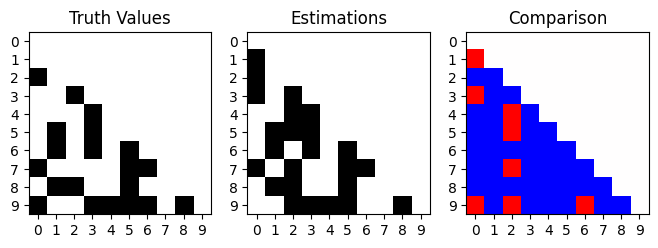

In [ ]:
import matplotlib.pyplot as plt
print("Plot estimated connections and true connections as comparison")
matrix1 = truth
matrix2 = estimation
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Plot the truth values
axes[0].imshow(matrix1, cmap='binary', interpolation='nearest')
axes[0].set_yticks(np.arange(matrix1.shape[0]))
axes[0].set_xticks(np.arange(matrix1.shape[1]))
axes[0].set_title('Truth Values')

# Plot the estimation values
axes[1].imshow(matrix2, cmap='binary', interpolation='nearest')
axes[1].set_yticks(np.arange(matrix1.shape[0]))
axes[1].set_xticks(np.arange(matrix1.shape[1]))
axes[1].set_title('Estimations')

# PLot it nicely
comparison_matrix = np.zeros_like(matrix1)
for i in range(matrix1.shape[0]):
    for j in range(i):
        if int(matrix1[i, j]) == int(matrix2[i, j]):
            comparison_matrix[i, j] = -1  # Equal values (blue)
        else:
            comparison_matrix[i, j] = 1  # Unequal values (red)

axes[2].imshow(comparison_matrix, cmap='bwr', interpolation='nearest')
axes[2].set_yticks(np.arange(matrix1.shape[0]))
axes[2].set_xticks(np.arange(matrix1.shape[1]))
axes[2].set_title('Comparison')

plt.show()

# Conclusion

This investigation has shown that approximated SHAP
values with Deep SHAP in LSTM models do show simi-
larities to connections. Using the LSTM structure with two
LSTM layers and one fully connected layer before the output,
most accurate mappings with the used procedures could be
produced. Furthermore, models which used the earlier values
of the output signal as feature showed better results than
models only using all other signals. Even though up to 82%
correct connections could be mapped. Training the same model
on differently split and shuffled data occasionally lead to a
reduced possibilities. Worse cases holding possible mappings
with only 55% correct labeled connections were encountered.
One aspect which is likely to affect this procedure is the earlier
mentioned problem of mediating connections. This mediation
implies, non-connected features to show high contribution
for the output signal. Nevertheless, more specific thresholds
and more complex mapping functions are likely too further
increase the the accuracy.

# References

[1] D. J. Heeger and D. Ress, “What does fmri tell us about neuronal
activity?,” Nature Reviews Neuroscience, vol. 3, p. 142–151, Feb. 2002.  <br/>
[2] B. P. Rogers, V. L. Morgan, A. T. Newton, and J. C. Gore, “Assessing
functional connectivity in the human brain by fmri,” Magnetic Reso-
nance Imaging, vol. 25, p. 1347–1357, Dec. 2007.  <br/>
[3] A. L. Wei-Chung, “A new field of neuroscience aims to map connections
in the brain,” Harvard Medical School News Research, 2023. Copyright
© 2023 by The President and Fellows of Harvard College. <br/>
[4] O. Sporns, “Structure and function of complex brain networks,” Dia-
logues in Clinical Neuroscience, vol. 15, p. 247–262, Sept. 2013.  <br/>
[5] S. Ackerman, Discovering the Brain. Washington, DC: National
Academies Press (US), 1992. <br/>
[6] A. Salvalaggio, L. Pini, A. Griffa, and M. Corbetta, “Editorial: Brain
connectivity in neurological disorders,” Frontiers in Systems Neuro-
science, vol. 17, Sept. 2023. <br/>
[7] E. Choi, A. Schuetz, W. F. Stewart, and J. Sun, “Using recurrent neural
network models for early detection of heart failure onset,” Journal of the
American Medical Informatics Association, vol. 24, p. 361–370, Aug.
2016. <br/>
[8] J. A. Dhanke, R. K. Maurya, S. Navaneethan, D. Mavaluru, S. Nuhmani,
N. Mishra, and E. Venugopal, “Recurrent neural model to analyze the
effect of physical training and treatment in relation to sports injuries,”
Computational Intelligence and Neuroscience, vol. 2022, p. 1–9, Sept.
2022. <br/>
[9] V. Kotoula, J. W. Evans, C. E. Punturieri, and C. A. Zarate, “Review:
The use of functional magnetic resonance imaging (fmri) in clinical
trials and experimental research studies for depression,” Frontiers in
Neuroimaging, vol. 2, June 2023. <br/>
[10] M. Carb´o-Carret´e, C. Ca˜nete-Mass´e, M. Per´o-Cebollero, and J. Gu`ardia-
Olmos, “Using fmri to assess brain activity in people with down
syndrome: A systematic review,” Frontiers in Human Neuroscience,
vol. 14, Apr. 2020. <br/>
[11] S. Eickhoff and V. M¨uller, Functional Connectivity, p. 187–201. Else-
vier, 2015. <br/>
[12] K. S. Rosch and S. Mostofsky, Development of the frontal lobe,
p. 351–367. Elsevier, 2019. <br/>
[13] M. Politis, G. Pagano, and F. Niccolini, Imaging in Parkinson’s Disease,
p. 233–274. Elsevier, 2017. <br/>
[14] G. Prando, M. Zorzi, A. Bertoldo, M. Corbetta, M. Zorzi, and A. Chiuso,
“Sparse dcm for whole-brain effective connectivity from resting-state
fmri data,” NeuroImage, vol. 208, p. 116367, Mar. 2020. <br/>
[15] Y. Nie, E. Opoku, L. Yasmin, Y. Song, J. Wang, S. Wu, V. Scarapicchia,
J. Gawryluk, L. Wang, J. Cao, and F. S. Nathoo, “Spectral dynamic
causal modelling of resting-state fmri: an exploratory study relating
effective brain connectivity in the default mode network to genetics,”
Statistical Applications in Genetics and Molecular Biology, vol. 19, June
2020. <br/>
[16] A. Fornito, A. Zalesky, and E. T. Bullmore, Fundamentals of Brain Network Analysis, p. 37–88. Elsevier, 2016. <br/>
[17] Y. Hu, C. Wen, G. Cao, J. Wang, and Y. Feng, “Brain network con-
nectivity feature extraction using deep learning for alzheimer’s disease
classification,” Neuroscience Letters, vol. 782, p. 136673, June 2022. <br/>
[18] S. Siami-Namini, N. Tavakoli, and A. S. Namin, “The performance
of LSTM and BiLSTM in forecasting time series,” in 2019 IEEE
International Conference on Big Data (Big Data), IEEE, Dec. 2019. <br/>
[19] S. Siami-Namini, N. Tavakoli, and A. S. Namin, “A comparison of
ARIMA and LSTM in forecasting time series,” in 2018 17th IEEE Inter-
national Conference on Machine Learning and Applications (ICMLA),
IEEE, Dec. 2018. <br/>
[20] R. R. Selvaraju, M. Cogswell, A. Das, R. Vedantam, D. Parikh, and
D. Batra, “Grad-cam: Visual explanations from deep networks via
gradient-based localization,” 2016. <br/>
[21] A. Kapishnikov, T. Bolukbasi, F. Vi´egas, and M. Terry, “Xrai: Better
attributions through regions,” 2019. <br/>
[22] S. Lundberg and S.-I. Lee, “A unified approach to interpreting model
predictions,” 2017. <br/>
[23] U. Schlegel, H. Arnout, M. El-Assady, D. Oelke, and D. A. Keim,
“Towards a rigorous evaluation of XAI methods on time series,” in 2019
IEEE/CVF International Conference on Computer Vision Workshop
(ICCVW), IEEE, Oct. 2019. <br/>
[24] A. Shrikumar, P. Greenside, and A. Kundaje, “Learning impor-
tant features through propagating activation differences,” ICML’17,
p. 3145–3153, JMLR.org, 2017. <br/>
[25] K. Friston, L. Harrison, and W. Penny, “Dynamic causal modelling,”
NeuroImage, vol. 19, no. 4, pp. 1273–1302, 2003. <br/>
[26] A. Veloz, 2023.

# Appendix with SHAP plots

In [ ]:
shaps = mean_shaps[0]
explainer = explainers[0]
shap.initjs()
shap.force_plot(explainer.expected_value[0], shaps, data_frame.columns)

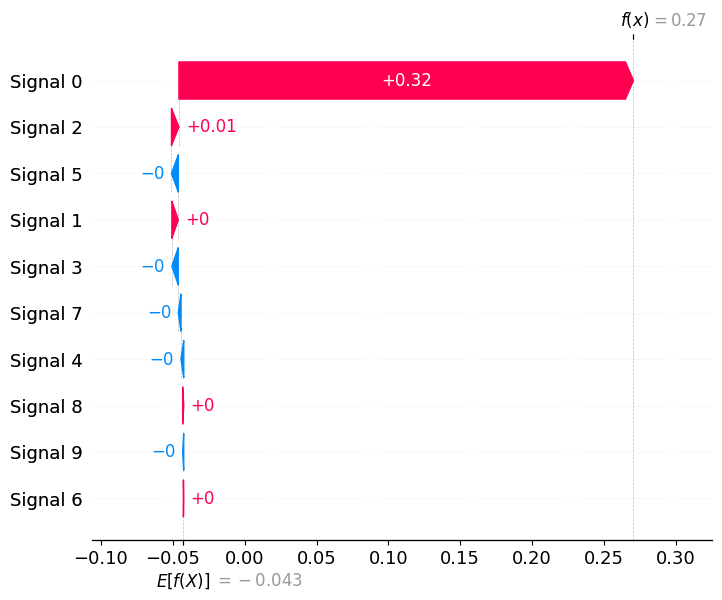

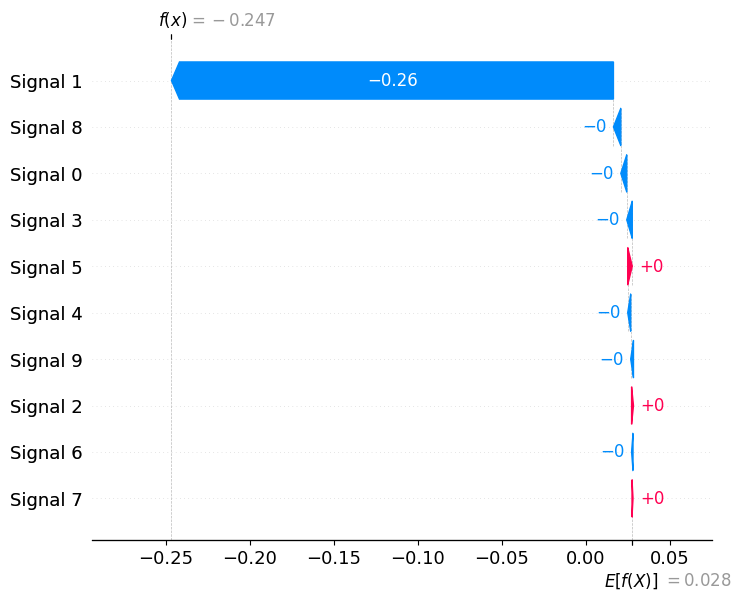

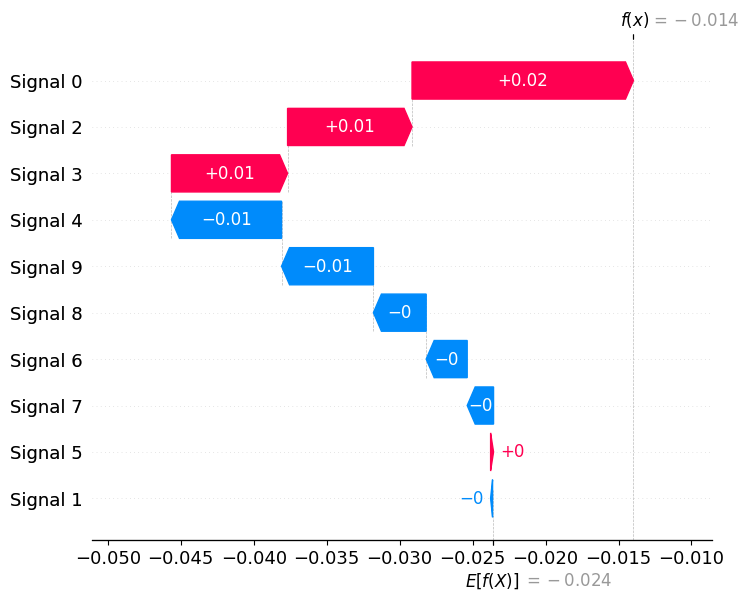

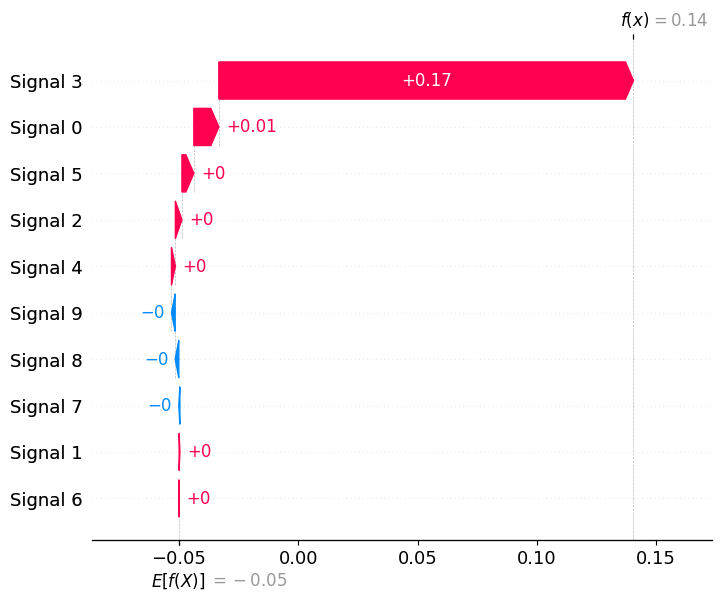

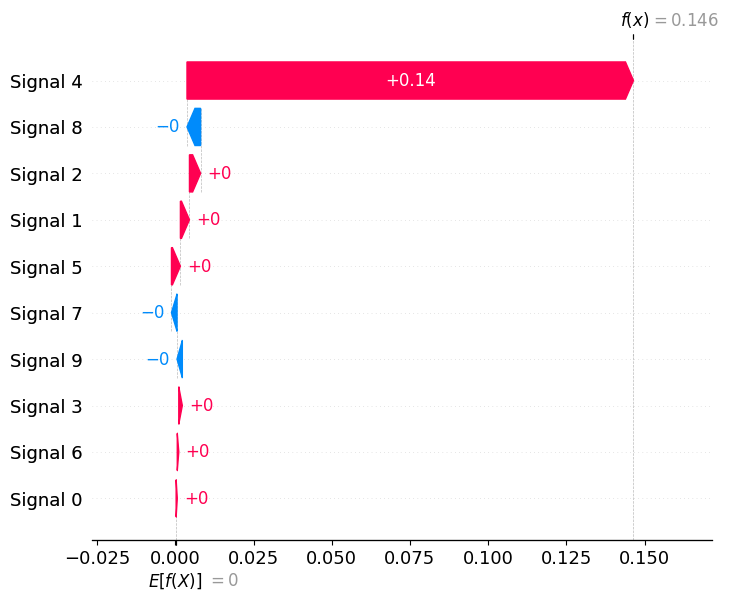

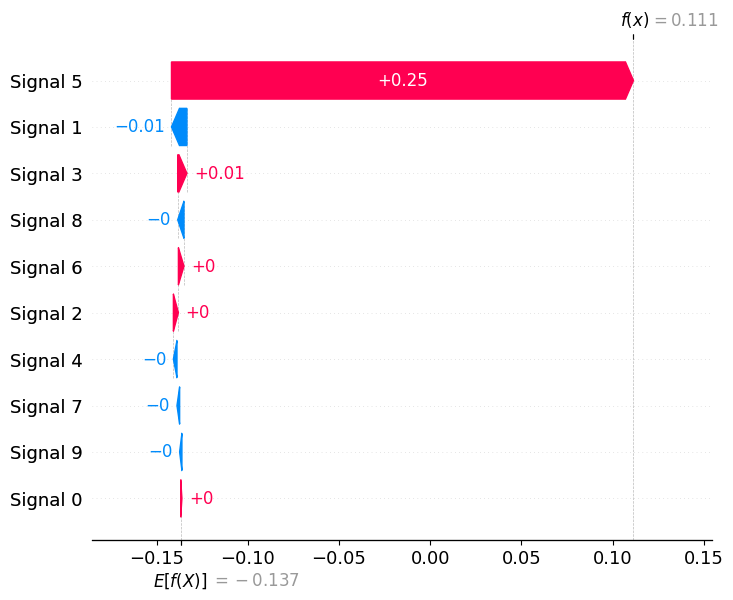

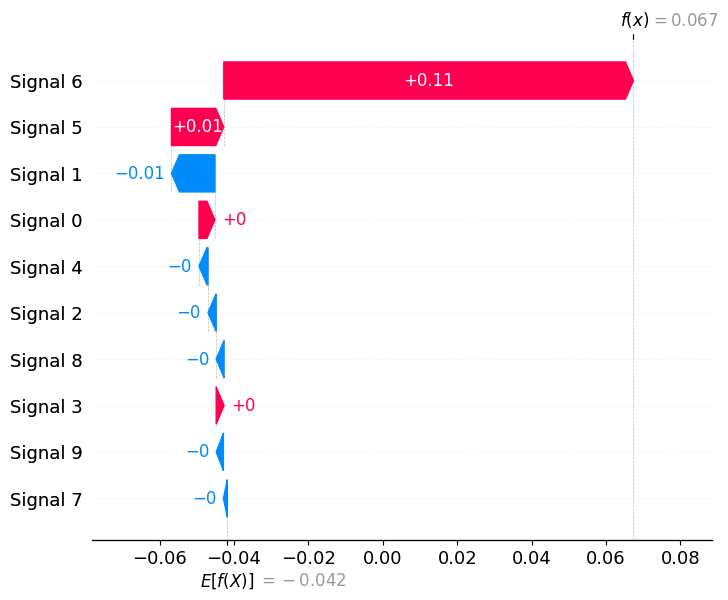

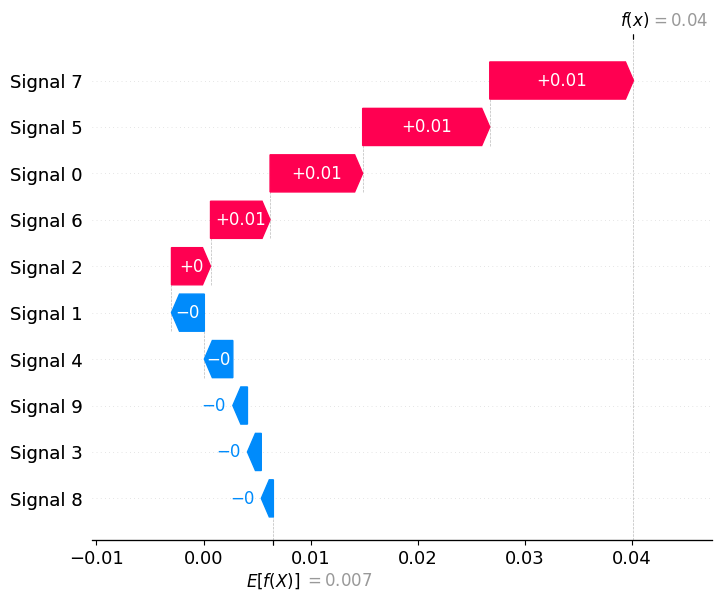

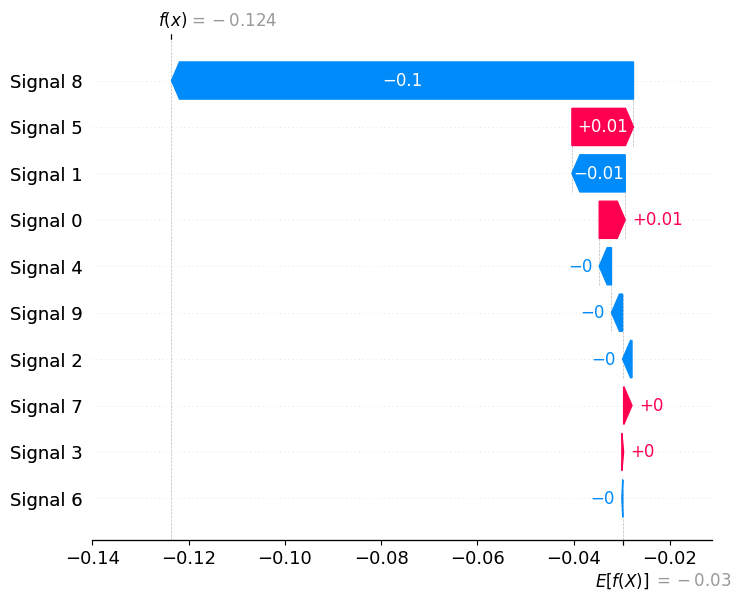

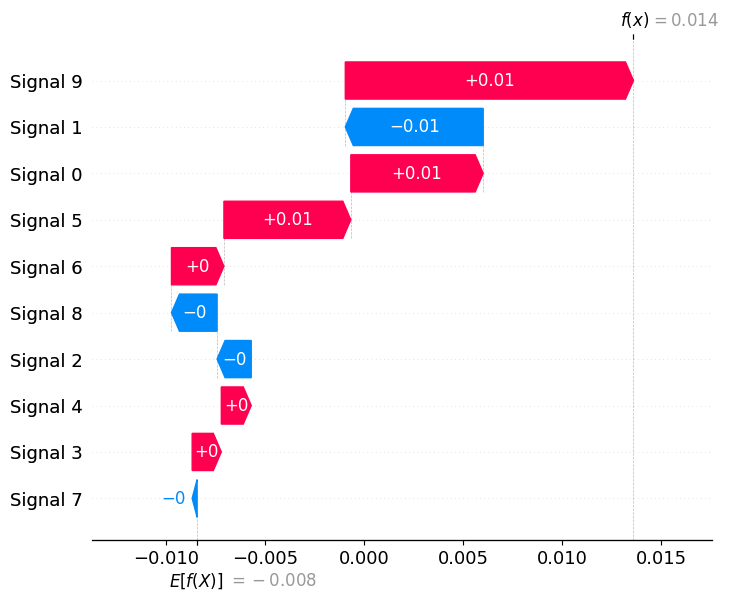

In [ ]:
for i in range(len(mean_shaps)):
    shap.plots._waterfall.waterfall_legacy(explainers[i].expected_value[0],
                                           mean_shaps[i][-1],
                                           feature_names = data_frame.columns,
                                           show = True,
                                           max_display=12)